In [40]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
def dataplot(data, label):

    data1 = data[label.label==-1]
    data2 = data[label.label==1]

    plt.scatter(data1.x, data1.y, c='red')
    plt.scatter(data2.x, data2.y, c='blue')
    #plt.show()

In [42]:
def mapping2higher(x1, x2):
    x = []
    for i in range(x1.shape[0]):
        temp = []
        temp.append(1.0)
        temp.append(x1[i].tolist()[0])
        temp.append(x2[i].tolist()[0])
        temp.append(x1[i].tolist()[0]**2)
        temp.append(x1[i].tolist()[0] * x2[i].tolist()[0])
        temp.append(x2[i].tolist()[0]**2)
        x.append(temp)
    return np.array(x)

In [43]:
df = pd.read_excel('./data.xlsx')

In [44]:
df

,X3-1,X3-2,X4-1,X4-2
0,-3.0,-2.9,-2.0,-8.4
1,0.5,8.7,-8.9,0.2
2,2.9,2.1,-4.2,-7.7
3,-0.1,5.2,-8.5,-3.2
4,-4.0,2.2,-6.7,-4.0
5,-1.3,3.7,-0.5,-9.2
6,-3.4,6.2,-5.3,-6.7
7,-4.1,3.4,-8.7,-6.4
8,-5.1,1.6,-7.1,-9.7
9,1.9,5.1,-8.0,-6.3


In [45]:
mapping2higher(df[['X3-1']][0:2].values, df[['X3-2']][0:2].values)

array([[ 1.  , -3.  , -2.9 ,  9.  ,  8.7 ,  8.41],
       [ 1.  ,  0.5 ,  8.7 ,  0.25,  4.35, 75.69]])

In [46]:
classs_1_feature = mapping2higher(df[['X3-1']].values, df[['X3-2']].values)
classs_2_feature = mapping2higher(df[['X4-1']].values, df[['X4-2']].values)

In [47]:
classs_1_feature

array([[ 1.000e+00, -3.000e+00, -2.900e+00,  9.000e+00,  8.700e+00,
         8.410e+00],
       [ 1.000e+00,  5.000e-01,  8.700e+00,  2.500e-01,  4.350e+00,
         7.569e+01],
       [ 1.000e+00,  2.900e+00,  2.100e+00,  8.410e+00,  6.090e+00,
         4.410e+00],
       [ 1.000e+00, -1.000e-01,  5.200e+00,  1.000e-02, -5.200e-01,
         2.704e+01],
       [ 1.000e+00, -4.000e+00,  2.200e+00,  1.600e+01, -8.800e+00,
         4.840e+00],
       [ 1.000e+00, -1.300e+00,  3.700e+00,  1.690e+00, -4.810e+00,
         1.369e+01],
       [ 1.000e+00, -3.400e+00,  6.200e+00,  1.156e+01, -2.108e+01,
         3.844e+01],
       [ 1.000e+00, -4.100e+00,  3.400e+00,  1.681e+01, -1.394e+01,
         1.156e+01],
       [ 1.000e+00, -5.100e+00,  1.600e+00,  2.601e+01, -8.160e+00,
         2.560e+00],
       [ 1.000e+00,  1.900e+00,  5.100e+00,  3.610e+00,  9.690e+00,
         2.601e+01]])

In [48]:
classs_2_feature

array([[ 1.000e+00, -2.000e+00, -8.400e+00,  4.000e+00,  1.680e+01,
         7.056e+01],
       [ 1.000e+00, -8.900e+00,  2.000e-01,  7.921e+01, -1.780e+00,
         4.000e-02],
       [ 1.000e+00, -4.200e+00, -7.700e+00,  1.764e+01,  3.234e+01,
         5.929e+01],
       [ 1.000e+00, -8.500e+00, -3.200e+00,  7.225e+01,  2.720e+01,
         1.024e+01],
       [ 1.000e+00, -6.700e+00, -4.000e+00,  4.489e+01,  2.680e+01,
         1.600e+01],
       [ 1.000e+00, -5.000e-01, -9.200e+00,  2.500e-01,  4.600e+00,
         8.464e+01],
       [ 1.000e+00, -5.300e+00, -6.700e+00,  2.809e+01,  3.551e+01,
         4.489e+01],
       [ 1.000e+00, -8.700e+00, -6.400e+00,  7.569e+01,  5.568e+01,
         4.096e+01],
       [ 1.000e+00, -7.100e+00, -9.700e+00,  5.041e+01,  6.887e+01,
         9.409e+01],
       [ 1.000e+00, -8.000e+00, -6.300e+00,  6.400e+01,  5.040e+01,
         3.969e+01]])

In [49]:
labels = np.array([3]*10 + [4]*10)

In [50]:
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [51]:
classes_feature = np.concatenate((classs_1_feature, classs_2_feature), axis=0)

----support vector indice----
[ 0  1 10 11 15]
------ support vector ------
[[ 1.000e+00 -3.000e+00 -2.900e+00  9.000e+00  8.700e+00  8.410e+00]
 [ 1.000e+00  5.000e-01  8.700e+00  2.500e-01  4.350e+00  7.569e+01]
 [ 1.000e+00 -2.000e+00 -8.400e+00  4.000e+00  1.680e+01  7.056e+01]
 [ 1.000e+00 -8.900e+00  2.000e-01  7.921e+01 -1.780e+00  4.000e-02]
 [ 1.000e+00 -5.000e-01 -9.200e+00  2.500e-01  4.600e+00  8.464e+01]]
------- coef of feacture -------
[[-1.30104261e-18 -1.11120406e-02 -9.88635351e-02  3.78999287e-02
   2.10449994e-02  2.39074147e-02]]
--------- intercept_ -------
[-2.04490349]
--------- n_support_ -------
[2 3]


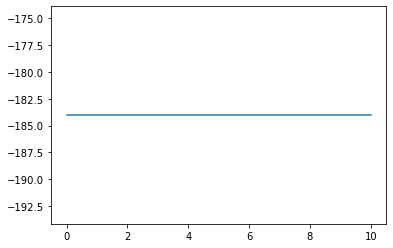

In [52]:
clf = SVC(C=0.5,kernel='linear')
clf.fit(classes_feature, labels)
print('----support vector indice----')
print(clf.support_)
print('------ support vector ------')
print(clf.support_vectors_)
print('------- coef of feacture -------')
print(clf.coef_)
print('--------- intercept_ -------')
print(clf.intercept_)
print('--------- n_support_ -------')
print(clf.n_support_)

x = np.array([0, 10])
y = -1/clf.coef_[0,1] * (clf.coef_[0,0] * x + clf.intercept_)

plt.plot(x,y)
plt.show()

In [53]:
np.sum(clf.coef_ ** 2)

0.01234833708321175

In [54]:
clf.predict(classes_feature) == labels

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [33]:
def linear_dist():
    df = pd.read_excel('./data.xlsx')
    for i in range(3,11):
        print(i)
        classs_1_feature = mapping2higher(df[['X3-1']][0:i].values, df[['X3-2']][0:i].values)
        classs_2_feature = mapping2higher(df[['X4-1']][0:i].values, df[['X4-2']][0:i].values)
        labels = np.array([3]*(i-1) + [4]*(i-1))
        classes_feature = np.concatenate((classs_1_feature, classs_2_feature), axis=0)
        clf = SVC(C=0.5,kernel='linear')
        clf.fit(classes_feature, labels)
        if np.all(clf.predict(classes_feature) == labels):
            print(str(i-1)+" can")
        else:
            print(str(i-1)+" can not!!!!!!")

In [34]:
linear_dist()

3


ValueError: Found input variables with inconsistent numbers of samples: [6, 4]